## TRABALHO PRÁTICO 1

Desenvolva um Jupyter notebook com a análise de dados do "dataset" em anexo, que descreve a precipitação segundo estações meteorológicas do inmet.

É preciso avaliar a evolução da precipitação acumulada nos 4 trimestres dos anos de 2010-2020.

O arquivo a ser submetido deve estar em formato ".ipynb" e deve conter:

In [36]:

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

caminho = './'
dataset_orig = 'dataset_reg_chuva_santa_maria_2011_2020_2.csv'

# caminho para o dataset original
dataset_original_coletas = pd.read_csv(caminho + dataset_orig, sep = ';')

# quantidade total de registros coletados
quantidade_registros_coletadas_horas = len(dataset_original_coletas)

# conta quantidade de linhas com valores nulos na coluna de chuva
dados_ausentes_chuva_horas = dataset_original_coletas['CHUVA'].isna().sum()

# apaga as linhas com valores null na coluna CHUVA
dataset_original_coletas['CHUVA'].dropna(inplace = True)
dataset_original_coletas['DT_MEDICAO'].dropna(inplace = True)

# dataset original
dataset_original_coletas.sort_values(by = ['DT_MEDICAO', 'HR_MEDICAO'], inplace = True)
# reseta indice depois de ordenar linhas
dataset_original_coletas.reset_index(drop = True, inplace = True)

# pegando primeira e última data do dataset
todas_datas = dataset_original_coletas['DT_MEDICAO']
data_inicial = todas_datas[0]
data_final = todas_datas[len(dataset_original_coletas) - 1]

# convertendo primeira e última data para formato datetime
data_inicial_date = datetime.strptime(data_inicial, '%Y-%m-%d')
data_final_date = datetime.strptime(data_final, '%Y-%m-%d')

# vetor de datas com o período compreendido
dif_data_final_data_inicial = data_final_date - data_inicial_date
datas_periodo = pd.date_range(data_inicial_date, periods = (dif_data_final_data_inicial.days + 1))

# contando dias previstos no periodo para relatorio exercicio 3
quantidade_registros_esperada_dias = len(datas_periodo) 

# criando dataframe com as datas do período 
leituras = np.zeros(len(datas_periodo), dtype=int)
# criando estrutura dicionario com conjunto de dias e leituras
dt_periodo_previsto_coletas_dias = pd.DataFrame({'DT_MEDICAO' : datas_periodo, 'CHUVA' : leituras})

for linha, coluna in dataset_original_coletas.iterrows():
    dataset_original_coletas.at[linha, 'DT_MEDICAO'] = pd.Timestamp(coluna['DT_MEDICAO'])
    # substitui a virgula como divisor de float pelo ponto
    dataset_original_coletas.at[linha, 'CHUVA'] = float(str(coluna['CHUVA']).replace(',', '.'))
    
dataset_original_coletas_trimestre = dataset_original_coletas.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['count' , 'sum'])

leituras_trimestres = np.zeros(40, dtype=float)
rotulos_trimestres = []
indice = 0
for linha, coluna in dataset_original_coletas_trimestre.iterrows():       
    trimestre = int(int(linha.strftime("%m")) / 3)
    leitura_trimestre = round(coluna['sum'], 2)
    rotulo_trimestre = str(linha.strftime("%Y")) + "/" + str(trimestre)
    leituras_trimestres[indice] = leitura_trimestre
    rotulos_trimestres.append(rotulo_trimestre)
    indice += 1

dataframe1 = pd.DataFrame({'Trimestre' : rotulos_trimestres, 'Leituras' : leituras_trimestres })      

dataframe1.to_csv('dataframe1.csv')
 
dt_previsto_coletas_trimestre = dt_periodo_previsto_coletas_dias.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['count']) 
indice = 0
coletas_realizadas = np.zeros(40, dtype=int)
coletas_previstas = np.zeros(40, dtype=int)
percentual_coletas_realizadas = []

for linha, coluna in dataset_original_coletas_trimestre.iterrows():    
    coletas_realizadas[indice] = coluna['count']
    coletas_previstas[indice] = dt_previsto_coletas_trimestre.at[linha, 'count'] * 24
    percentual_coletas_realizadas.append(str(round((coletas_realizadas[indice] / coletas_previstas[indice]) * 100, 1)) + '%')
    indice += 1

dataframe2 = pd.DataFrame({'Trimestre' : rotulos_trimestres,
                           'Coletas Realizadas' : coletas_realizadas, 
                           'Coletas Previstas' : coletas_previstas,
                           'Percentual de Coletas' : percentual_coletas_realizadas
                          })    

dataframe2.to_csv('dataframe2.csv')

print("\nForam excluídos da amostra", dados_ausentes_chuva_horas, "registros de chuva por ausência de dados.")
print("Este montante desconsiderado representa",
       str(round((dados_ausentes_chuva_horas / quantidade_registros_coletadas_horas) * 100, 1)) + "% dos registros de coletas realizadas e",
       str(round((dados_ausentes_chuva_horas / (quantidade_registros_esperada_dias * 24)) * 100, 1)) + "% dos registros previstos.")

print("Em dias são aproximadamente", round((dados_ausentes_chuva_horas / 24), 1),
       "dos", quantidade_registros_esperada_dias, "previstos representando",
       str(round(((dados_ausentes_chuva_horas / 24) / (quantidade_registros_esperada_dias)) * 100, 1)) + "% do total.") 



Foram excluídos da amostra 2956 registros de chuva por ausência de dados.
Este montante desconsiderado representa 5.6% dos registros de coletas realizadas e 3.4% dos registros previstos.
Em dias são aproximadamente 123.2 dos 3653 previstos representando 3.4% do total.


## Exercício 1

Uma tabela com uma coluna contendo todos os trimestres de 2010-2020 e as respectivas precipitações acumuladas.

In [29]:
import pandas as pd

caminho = './'
dataset_orig = 'dataframe1.csv'
 
dataframe1 = pd.read_csv(caminho + dataset_orig)

display(dataframe1[['Trimestre', 'Leituras']])


,Trimestre,Leituras
0,2011/1,233.6
1,2011/2,216.4
2,2011/3,82.6
3,2011/4,191.4
4,2012/1,238.0
5,2012/2,155.4
6,2012/3,179.8
7,2012/4,438.6
8,2013/1,332.2
9,2013/2,264.8


## Exercício 2 

Um gráfico com a evolução da precipitação que contenha todos os trimestres.

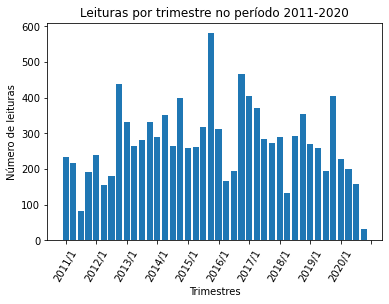

In [34]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

caminho = './'
dataset_orig = 'dataframe1.csv'
 
dataframe1 = pd.read_csv(caminho + dataset_orig)
 

y = dataframe1['Leituras']
x = dataframe1['Trimestre']

fig, ax = plt.subplots(1,1)  
tick_spacing = 4
ax.bar(x, y,width=0.8)
plt.title('Leituras por trimestre no período 2011-2020')
plt.xticks(rotation=60)
plt.ylabel('Número de leituras')
plt.xlabel('Trimestres')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()


## Exercício 3
As observações sobre o número de medidas perdidas (dados faltantes) nos trimestres de 2010-2020.

In [38]:
import pandas as pd

caminho = './'
dataset_orig = 'dataframe2.csv'
 
dataframe2 = pd.read_csv(caminho + dataset_orig)

display(dataframe2[['Trimestre', 'Coletas Realizadas', 'Coletas Previstas', 'Percentual de Coletas']])


,Trimestre,Coletas Realizadas,Coletas Previstas,Percentual de Coletas
0,2011/1,1264,2160,58.5%
1,2011/2,1210,2184,55.4%
2,2011/3,738,2208,33.4%
3,2011/4,1342,2208,60.8%
4,2012/1,1331,2184,60.9%
5,2012/2,1245,2184,57.0%
6,2012/3,1205,2208,54.6%
7,2012/4,1377,2208,62.4%
8,2013/1,1267,2160,58.7%
9,2013/2,1317,2184,60.3%
